### Profiles

This notebook contains visualizations for profiles csv files

In [9]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [10]:
project_root = Path(os.path.abspath('..'))

profiles_dir = project_root / "results" / "profiles"

In [11]:
def plot_instance_profiles(instance_name: str, metric: str = "cpu_percent", base_dir: str = profiles_dir):
    base_path = Path(base_dir)
    csv_files = sorted(base_path.glob(f"{instance_name}_profile_*.csv"))

    if not csv_files:
        print(f"No CSV files found for instance '{instance_name}' in {base_dir}")
        return

    plt.figure(figsize=(10, 6))

    for csv_path in csv_files:
        df = pd.read_csv(csv_path)
        label = csv_path.stem.replace(f"{instance_name}_profile_", "")
        plt.plot(df["timestamp_s"], df[metric], label=label)

    plt.title(f"{instance_name.upper()} — {metric.replace('_', ' ').title()} over Time", fontsize=14)
    plt.xlabel("Time (seconds)")
    plt.ylabel("CPU (%)" if metric == "cpu_percent" else "Memory (MB)")
    plt.legend(title="Mode")
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

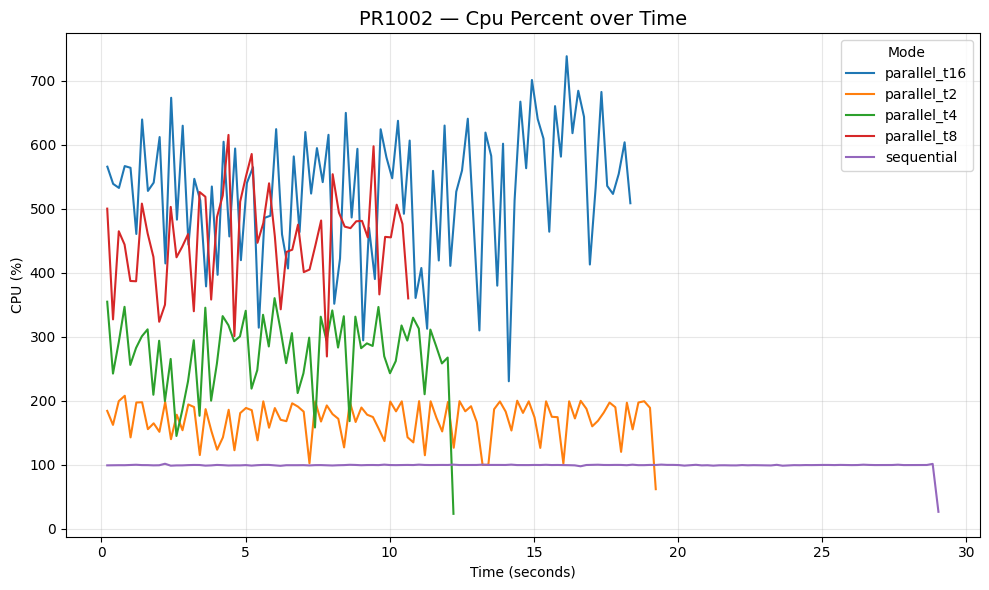

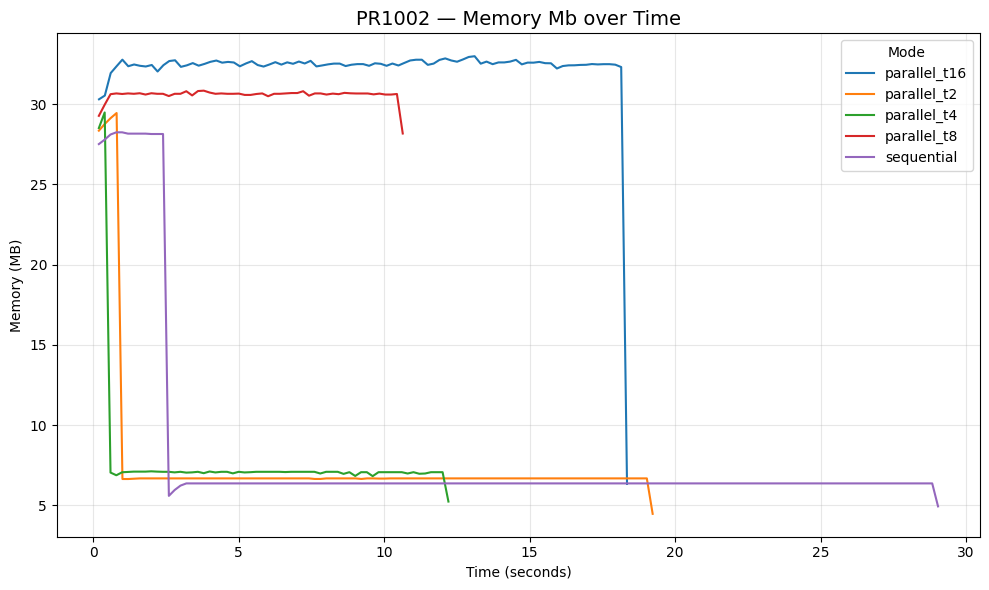

In [12]:
plot_instance_profiles("pr1002", metric="cpu_percent")
plot_instance_profiles("pr1002", metric="memory_mb")